In [16]:
import pandas as pd
import numpy as np
# The statistical module used to run chi square test
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

all_data = pd.read_csv('starting_data/hfi_cc_2018.csv',index_col="countries")

freedom_and_happiness = pd.read_csv('starting_data/happiness.csv',index_col="Country")

latest_year = all_data.loc[all_data['year'] == 2016]

df = latest_year.dropna(axis='columns')
df = df.merge(freedom_and_happiness, left_index=True, right_index=True, validate="one_to_one")
df = df.drop(columns=['year','ISO_code','region','ef_score','ef_rank','hf_quartile','pf_score','pf_rank','hf_rank','hf_score'])



df.head()

,pf_rol,pf_ss_homicide,pf_ss_disappearances_violent,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss,pf_movement,pf_expression_killed,pf_expression_jailed,...,ef_regulation_credit_private,ef_regulation_credit,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,Happiness score
Albania,5.291752,8.920429,10.00000,10.000000,10.000000,10.000000,8.806810,6.666667,10.0,10.0,...,7.295687,7.098562,10.0,6.916278,6.000000,9.713864,7.074366,6.705863,6.906901,4.719
Algeria,3.819566,9.456254,9.29403,9.926119,9.990149,8.842060,8.043882,5.000000,10.0,10.0,...,5.301526,5.100509,1.0,5.029513,1.777778,9.243070,7.029528,5.676956,5.268992,5.211
Argentina,5.744791,7.622974,10.00000,10.000000,9.990877,9.498175,9.040383,10.000000,10.0,10.0,...,4.259461,5.419820,10.0,5.151405,6.666667,9.122357,6.508295,5.535831,5.369019,6.086
Armenia,5.003205,8.808750,10.00000,9.316196,9.931620,9.349563,8.830549,6.666667,10.0,10.0,...,7.306138,9.102046,0.0,6.234630,6.000000,9.846472,6.491481,6.797530,7.378069,4.559
Australia,7.776279,9.623538,10.00000,10.000000,9.991739,9.998348,9.873962,10.000000,10.0,10.0,...,8.729074,9.576358,10.0,7.698589,10.000000,9.912606,8.823021,8.121631,8.465526,7.228


In [17]:
pvals = pd.DataFrame(columns=["column","pvalue","statistic"])

pv = []
statistics = []
for col in df.columns:
    t = stats.ttest_ind(df[col], df['Happiness score'], equal_var=False)
    pv.append(t.pvalue)
    statistics.append(t.statistic)

pvals["column"] = df.columns
pvals["pvalue"] = pv
pvals["statistic"] = statistics
pvals = pvals.set_index('column')
pvals = pvals.drop(index=['Happiness score'])

pvals = pvals.sort_values(by=['pvalue'])

critical_value = stats.chi2.ppf(q = 0.95, df = len(df) - 1)
pvals.head()

,pvalue,statistic
column,,
ef_legal_gender,3.377846e-88,-48.272532
ef_regulation_business_start,6.693284e-86,29.874152
ef_money_growth,9.325577e-65,22.878955
pf_ss_disappearances_fatalities,1.813986e-62,23.229326
pf_ss_disappearances_injuries,9.480367e-59,22.264014


In [21]:
chis = pd.DataFrame(columns=["column","pvalue","statistic"])
a = []
b = []
c = []
for index,col in pvals.iterrows():
    x2 = stats.chisquare(df[index], df['Happiness score'])
    a.append(index)
    b.append(x2.pvalue)
    c.append(x2.statistic)
    
    
chis["column"] = a
chis["pvalue"] = b
chis["statistic"] = c

chis.set_index("column")

#significants = chis.where(chis["statistic"]>critical_value).dropna().set_index("column")
significants = chis.sort_values(by=['pvalue'])
significants

,column,pvalue,statistic
9,pf_expression_killed,1.619985e-55,570.575836
6,pf_expression_jailed,5.431069e-55,567.437021
26,pf_identity_sex_female,7.408614e-53,554.628525
7,pf_ss_disappearances_violent,6.107525e-50,536.984218
4,pf_ss_disappearances_injuries,9.118250e-50,535.925407
34,ef_regulation_labor_conscription,3.740390e-48,526.080358
35,pf_identity_sex_male,6.115268e-48,524.772786
3,pf_ss_disappearances_fatalities,1.410991e-47,522.546465
0,ef_legal_gender,2.533081e-47,520.986491
29,pf_identity_sex,2.134120e-36,452.236721


pf_expression_killed


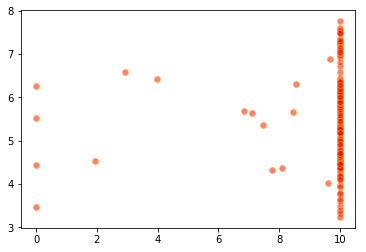

pf_expression_jailed


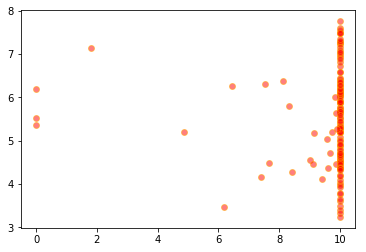

pf_identity_sex_female


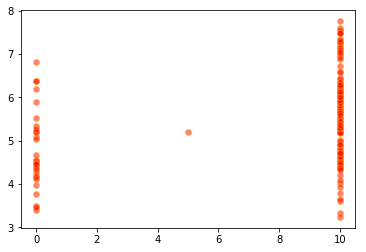

pf_ss_disappearances_violent


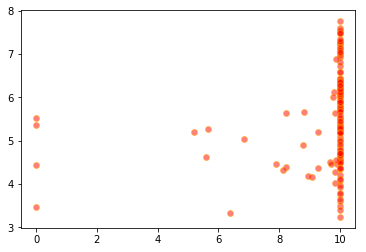

pf_ss_disappearances_injuries


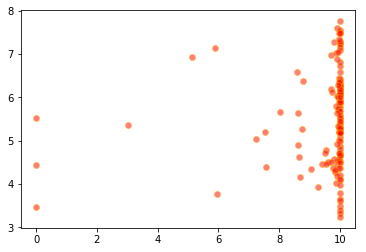

ef_regulation_labor_conscription


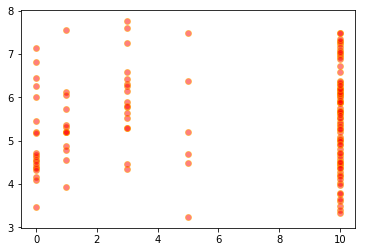

pf_identity_sex_male


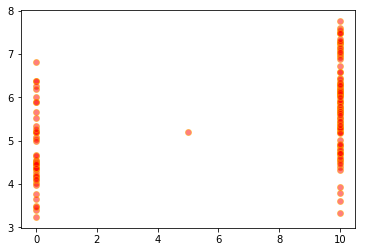

pf_ss_disappearances_fatalities


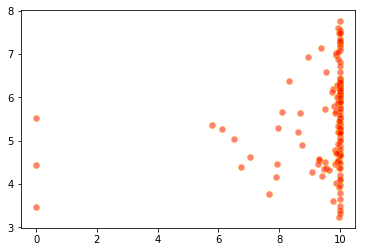

ef_legal_gender


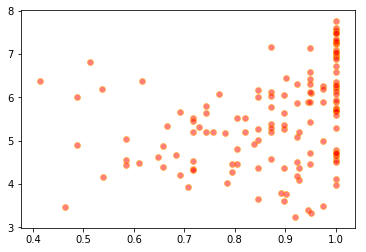

pf_identity_sex


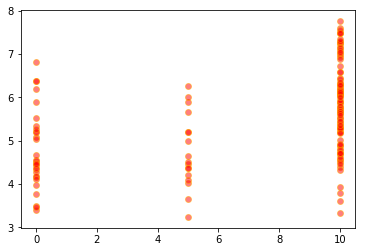

ef_regulation_business_start


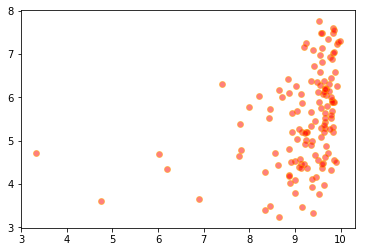

ef_money_inflation


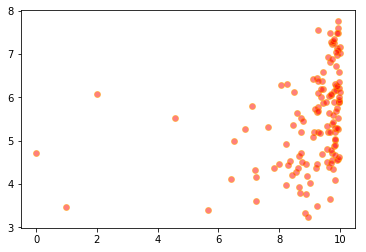

ef_money_currency


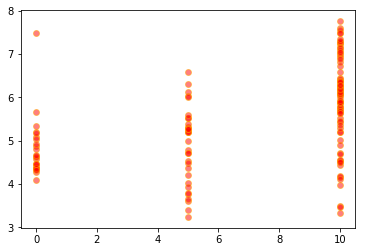

ef_money_sd


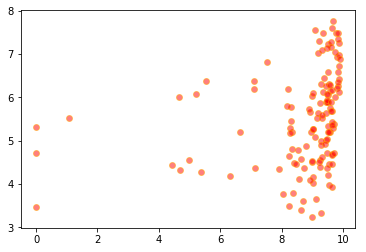

pf_ss_disappearances


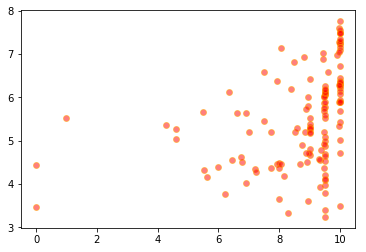

ef_money_growth


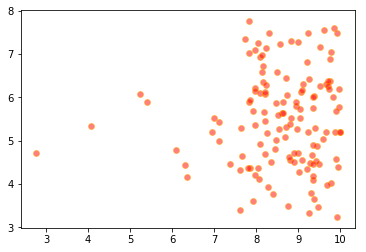

pf_ss_homicide


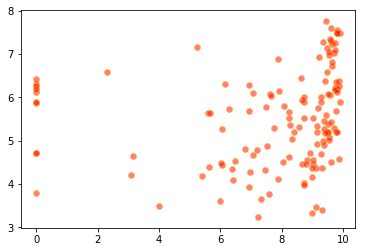

ef_government_tax_income


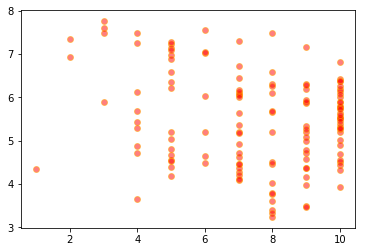

pf_movement


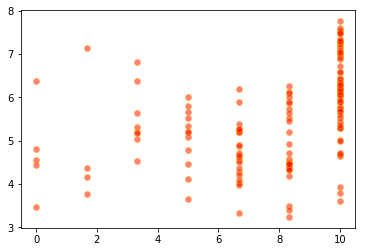

ef_regulation_credit_private


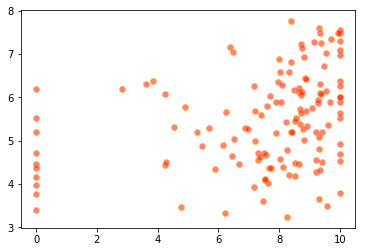

ef_regulation_credit


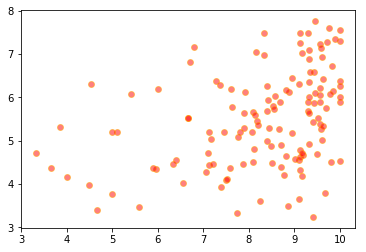

ef_money


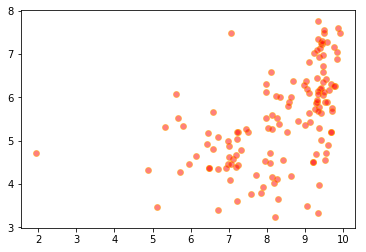

pf_identity


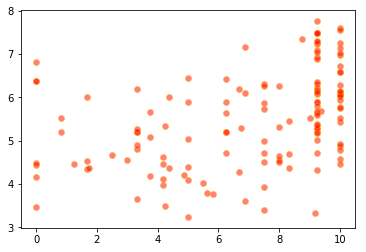

pf_ss


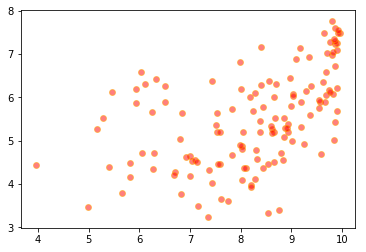

ef_government_tax


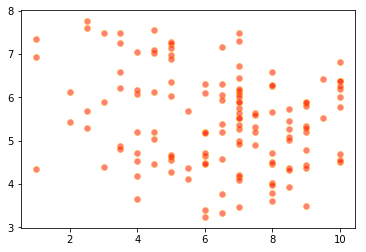

ef_trade_regulatory_compliance


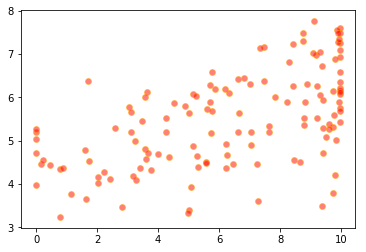

ef_government_consumption


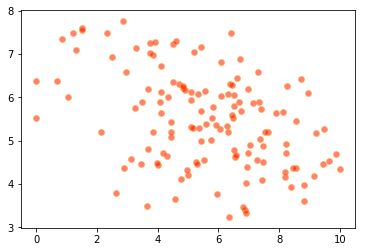

ef_regulation_business_compliance


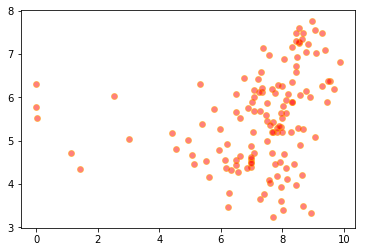

pf_expression


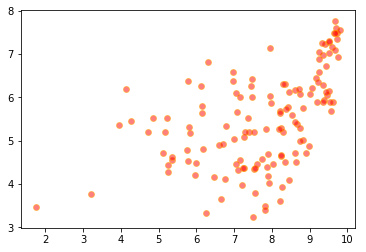

In [23]:
rs = pd.DataFrame(columns=["column","pvalue","correlation"])
a = []
b = []
c = []
for index,col in pvals.iterrows():
    x2 = stats.spearmanr(df[index], df['Happiness score'])
    a.append(index)
    b.append(x2.pvalue)
    c.append(x2.correlation)

rs["column"] = a
rs["pvalue"] = b
rs["correlation"] = c
rs = rs.sort_values(by=['pvalue'])
rs = rs.set_index("column")
rs

,pvalue,correlation
column,,
pf_rol,3.909141e-19,0.674790
ef_regulation_business_bureaucracy,8.011259e-18,0.655803
ef_trade,3.017934e-17,0.647011
ef_trade_regulatory,2.041721e-16,0.633812
ef_money,1.075067e-13,0.585567
ef_legal_military,1.107805e-13,0.585315
ef_legal,1.756324e-13,0.581422
ef_trade_regulatory_compliance,7.114241e-13,0.569279
pf_ss,1.995757e-12,0.559996


pf_rol


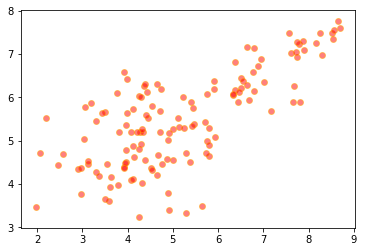

ef_regulation_business_bureaucracy


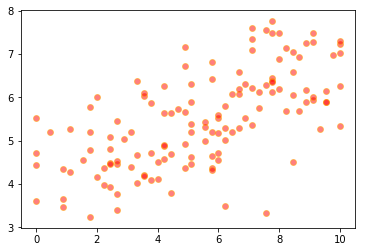

ef_trade


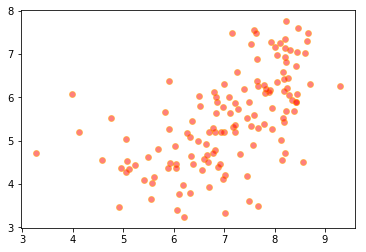

ef_trade_regulatory


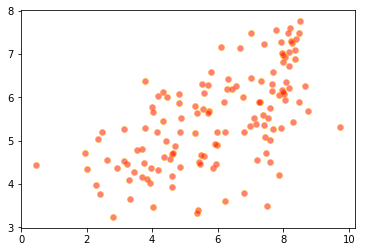

ef_money


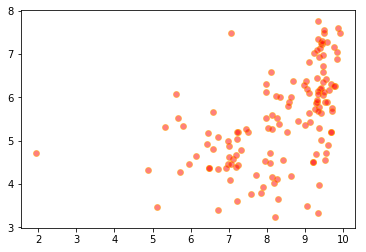

ef_legal_military


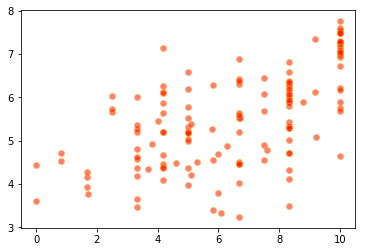

ef_legal


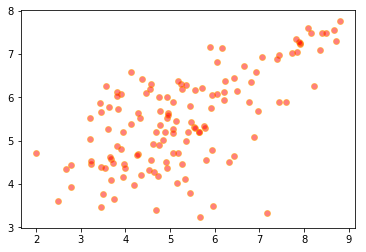

ef_trade_regulatory_compliance


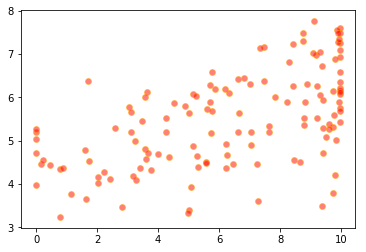

pf_ss


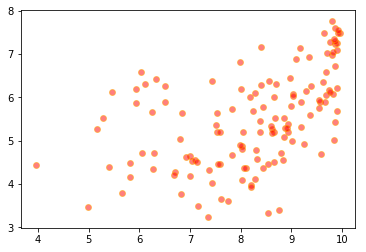

pf_expression


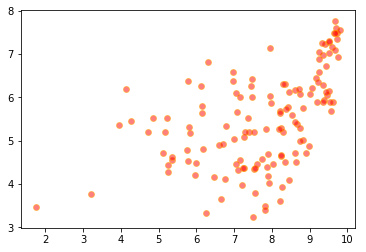

pf_expression_influence


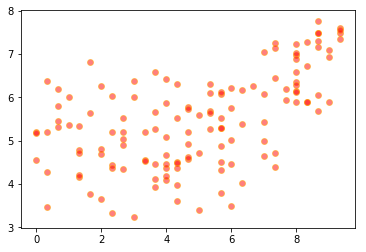

ef_regulation_business


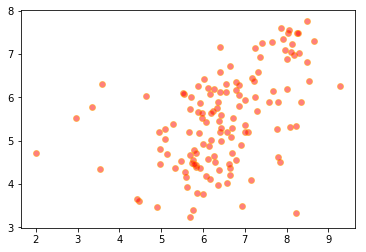

pf_expression_control


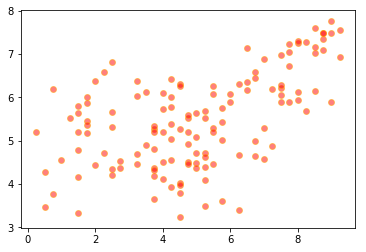

pf_movement


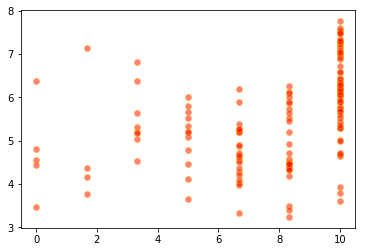

ef_money_currency


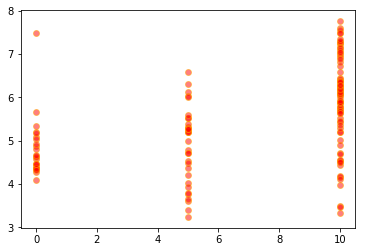

pf_ss_disappearances


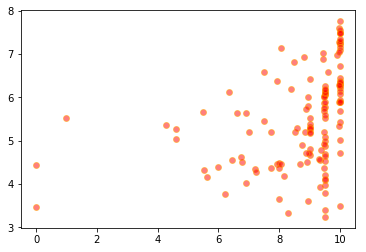

ef_money_inflation


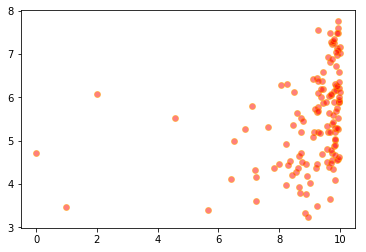

ef_regulation


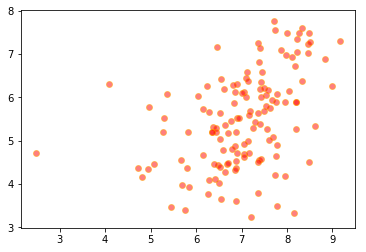

pf_identity_sex_male


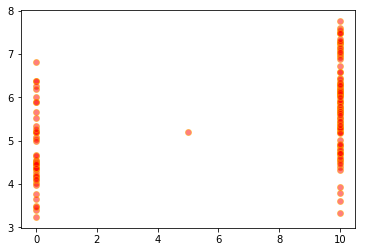

pf_identity


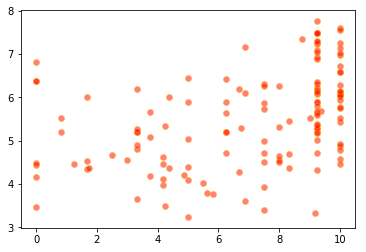

pf_identity_sex


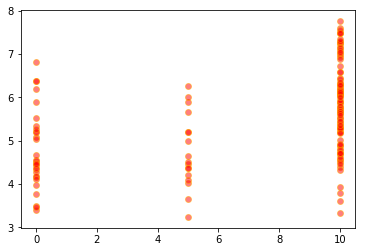

ef_trade_movement


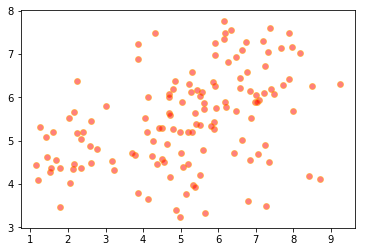

ef_money_sd


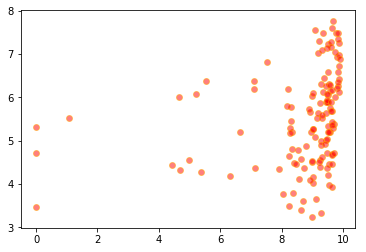

ef_regulation_business_start


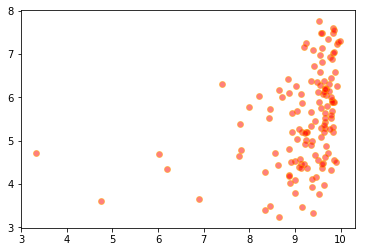

ef_regulation_credit


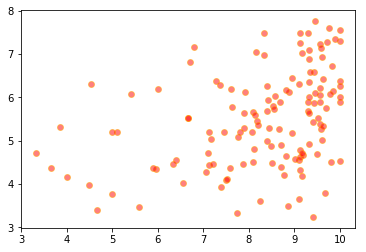

ef_legal_enforcement


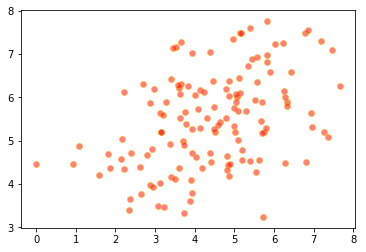

ef_legal_gender


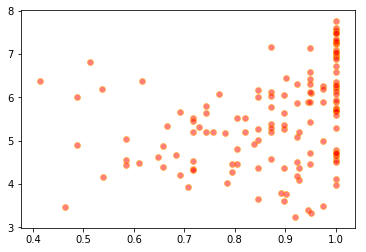

ef_regulation_business_compliance


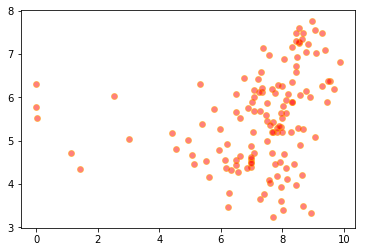

ef_government_consumption


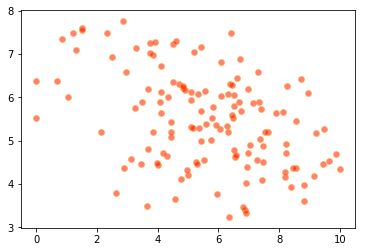

pf_ss_homicide


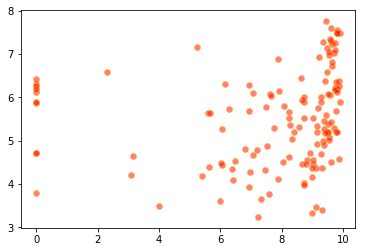

ef_regulation_credit_private


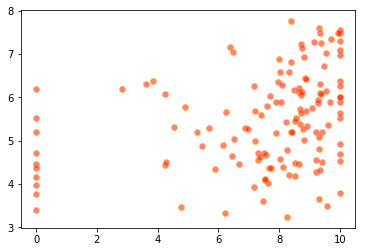

pf_identity_sex_female


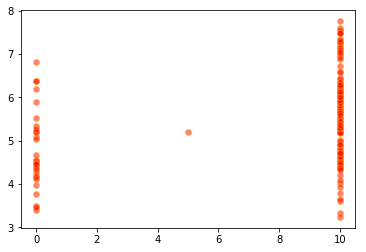

pf_ss_disappearances_violent


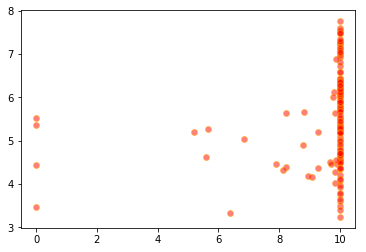

ef_legal_courts


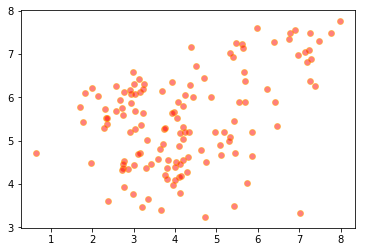

pf_ss_disappearances_fatalities


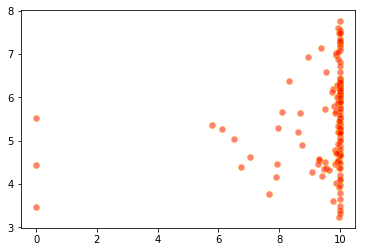

ef_government


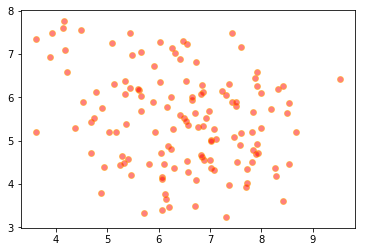

ef_government_tax


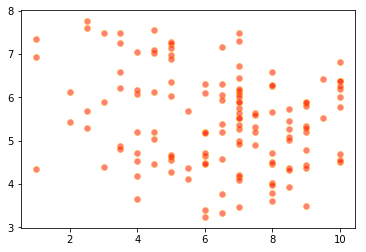

ef_government_tax_income


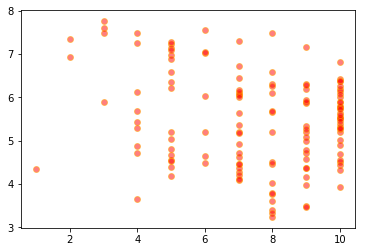

pf_expression_jailed


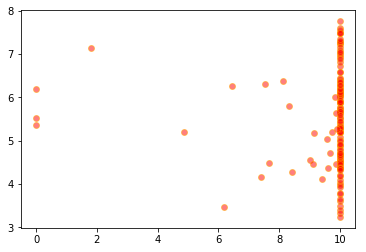

pf_ss_disappearances_injuries


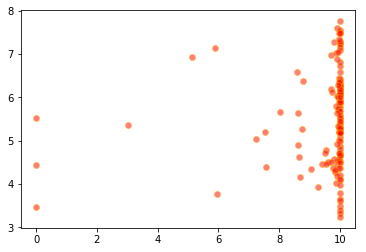

ef_regulation_labor


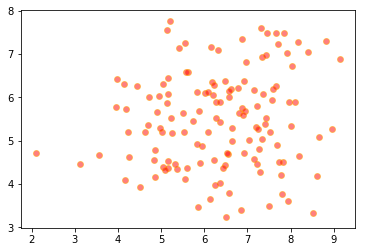

ef_regulation_labor_conscription


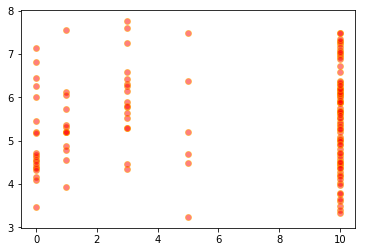

pf_expression_killed


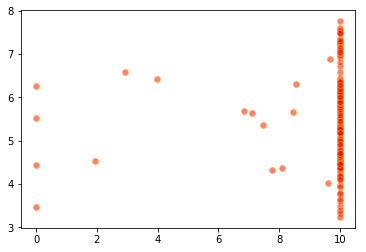

ef_money_growth


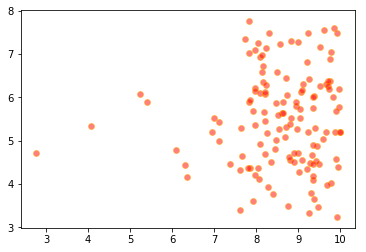

In [24]:
for index,row in rs.iterrows():
    print(index)
    plt.scatter(
        x=df[index],
        y=df["Happiness score"],
        marker="o", 
        facecolors="red", 
        edgecolors="orange", 
        alpha=0.50
    )
    plt.show()